k-means is not a well generalizable clustering algorithm

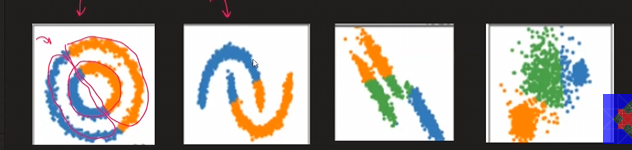

Since k-means works on distances, it fails on these types of data 

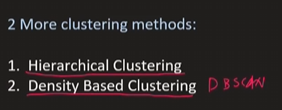

are used to solve these problems

# 🌳 Agglomerative Hierarchical Clustering

---

## 📚 **Core Concept**
**Bottom-up clustering** that builds a hierarchy by iteratively merging closest clusters until all points belong to one cluster.

---

## 🔄 **Algorithm Flow**

### **Step-by-Step Process:**
1. **Initialize**: Each point as its own cluster
2. **Compute**: Distance matrix between all clusters
3. **Merge**: Two closest clusters
4. **Update**: Distance matrix
5. **Repeat**: Until single cluster remains

### **Pseudocode:**
```python
def agglomerative_clustering(X, linkage='ward'):
    clusters = [{i} for i in range(n_points)]  # Initialize
    distances = compute_distance_matrix(X)
    
    while len(clusters) > 1:
        # Find closest pair
        i, j = find_min_distance(distances)
        # Merge clusters
        clusters[i] = clusters[i] ∪ clusters[j]
        del clusters[j]
        # Update distances
        update_distance_matrix(distances, i, j)
```

---

## 📏 **Linkage Criteria**

### **Single Linkage (MIN):**
$$d(C_i, C_j) = \min_{x_p \in C_i, x_q \in C_j} d(x_p, x_q)$$
- **Properties**: Tends to create elongated clusters
- **Problem**: Chain effect (chaining)

### **Complete Linkage (MAX):**
$$d(C_i, C_j) = \max_{x_p \in C_i, x_q \in C_j} d(x_p, x_q)$$
- **Properties**: Creates compact, spherical clusters
- **Robust**: Against outliers

### **Average Linkage (UPGMA):**
$$d(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x_p \in C_i} \sum_{x_q \in C_j} d(x_p, x_q)$$
- **Balance**: Between single and complete
- **Compromise**: Good general-purpose choice

### **Ward Linkage:**
$$d(C_i, C_j) = \sqrt{\frac{2n_i n_j}{n_i + n_j}} \|c_i - c_j\|_2$$
- **Minimizes**: Within-cluster sum of squares
- **Best for**: Spherical, equal-sized clusters

---

## 🌲 **Dendrogram Visualization**

```
        Dendrogram
            |
     ┌──────┴──────┐
     │             │
 ┌───┴───┐     ┌───┴───┐
 │       │     │       │
[A]     [B]  [C,D]   [E,F]
```

### **Key Information:**
- **Height**: Dissimilarity at merge
- **Branches**: Cluster relationships
- **Cut line**: Determines final clusters

---

## ⚡ **Complexity Analysis**

| Aspect | Complexity |
|--------|------------|
| **Time** | $O(n^3)$ naive, $O(n^2 \log n)$ optimized |
| **Space** | $O(n^2)$ for distance matrix |
| **Scalability** | Poor for large datasets |

### **Memory Optimization:**
```python
# Use sparse matrices for high-dimensional data
from scipy.sparse import csr_matrix
# Or use memory-efficient implementations
from sklearn.cluster import AgglomerativeClustering
```

---

## 🎯 **Distance Metrics**

### **Common Choices:**
- **Euclidean**: $d(x,y) = \sqrt{\sum_{i=1}^p (x_i - y_i)^2}$
- **Manhattan**: $d(x,y) = \sum_{i=1}^p |x_i - y_i|$
- **Cosine**: $d(x,y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}$
- **Correlation**: Based on Pearson correlation

### **Connectivity Constraints:**
```python
# Add structure to clustering
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10)
```

---

## 📊 **Advantages vs Disadvantages**

### ✅ **Advantages:**
- **No prior k specification** needed
- **Deterministic** results
- **Hierarchical structure** reveals data organization
- **Flexible** distance metrics and linkages
- **Works with any distance measure**

### ❌ **Disadvantages:**
- **Computationally expensive** $O(n^3)$
- **Sensitive to noise** and outliers
- **Difficult to handle** large datasets
- **Non-convex clusters** can be problematic
- **Greedy nature**: Cannot undo merges

---

## 🛠️ **Implementation Example**

```python
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Fit clustering
agg_clust = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    affinity='euclidean'
)
labels = agg_clust.fit_predict(X)

# Create dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.show()
```

---

## 🎯 **When to Use**

### ✅ **Best for:**
- **Small to medium datasets** (< 10K points)
- **Exploratory data analysis**
- **Understanding cluster hierarchy**
- **Irregular cluster shapes** (with appropriate linkage)
- **No prior knowledge of k**

### ❌ **Avoid when:**
- **Large datasets** (> 50K points)
- **High dimensionality** without preprocessing
- **Time-critical applications**
- **Memory constraints**

---

## 🔧 **Practical Tips**

### **Choosing Linkage:**
- **Ward**: Spherical, balanced clusters
- **Complete**: Compact clusters, robust to outliers  
- **Average**: General purpose, balanced approach
- **Single**: Elongated clusters, sensitive to noise

### **Determining Optimal Clusters:**
```python
# Elbow method on linkage distances
distances = linkage_matrix[:, 2]
plt.plot(range(1, len(distances)+1), distances[::-1])
# Look for "elbow" in the plot
```

---

## 📈 **Performance Optimization**
- **Preprocessing**: Scale features, remove outliers
- **Dimensionality reduction**: PCA before clustering
- **Sampling**: Use on subset, then assign remaining points
- **Approximate methods**: BIRCH for large datasets

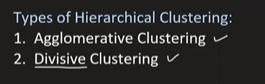

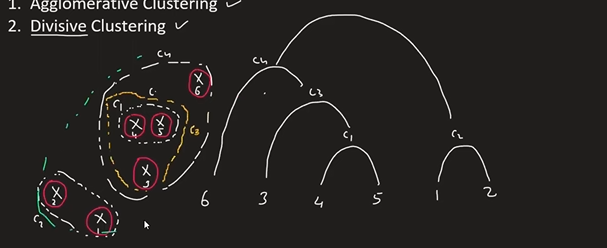

We use dendogram to keep track of the merges and the clusters

We then decide the no of clusters and cut off the dendogram form as many clusters as we need from it. Because we get 1 cluster in the end

## Divisive Clustering

This works in the exact opposite way to that of agglomerative clustering

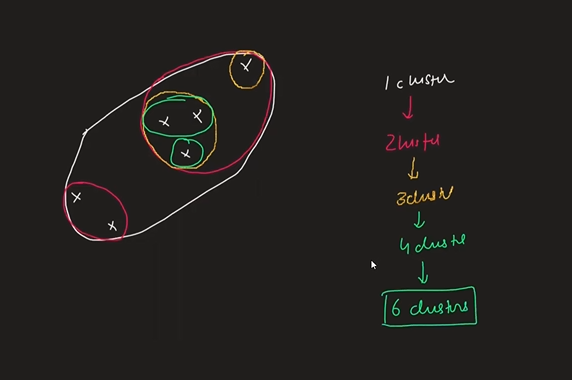

Start with 1 cluster, and then break it into more and more clusters

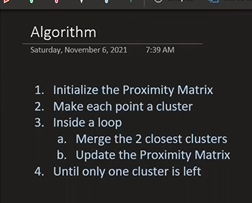

Proximity matrix is the distance matrix with the distances between each point between the indices

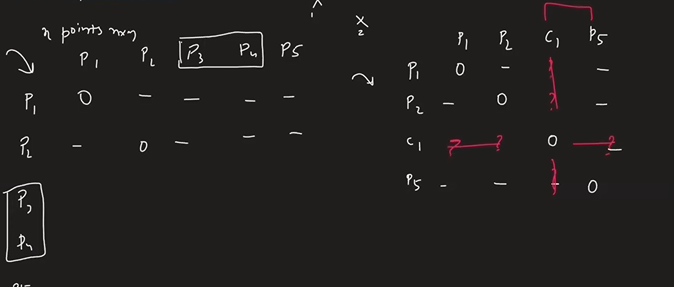

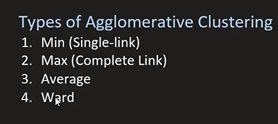

In **Agglomerative Hierarchical Clustering**, measuring distances is the **core step** for deciding which clusters (or points) to merge at each iteration. There are two main things to measure:

---

## 🧩 1. **Distance Between a Point and a Cluster**

This is required **only in the initial steps**, where we treat each data point as its own cluster and need to merge points into clusters.

Once clusters start forming, the key question becomes:

---

## 🧩 2. **Distance Between Two Clusters**

This is where **linkage criteria** come into play.

---

## 🔹 Linkage Criteria (Distance Between Clusters)

Here are the 4 most common methods:

### 1. **Single Linkage (Minimum Distance)**

* Distance between **two clusters** = **minimum distance** between any point in one cluster and any point in the other.

```math
D(A, B) = \min_{x \in A, y \in B} \|x - y\|
```

🧠 Tends to form long, "chain-like" clusters.

---

### 2. **Complete Linkage (Maximum Distance)**

* Distance = **maximum distance** between any point in one cluster and any point in the other.

```math
D(A, B) = \max_{x \in A, y \in B} \|x - y\|
```

🧠 Forms **compact** clusters but is sensitive to outliers.

---

### 3. **Average Linkage (Mean Distance)**

* Distance = **average of all pairwise distances** between points in the two clusters.

```math
D(A, B) = \frac{1}{|A||B|} \sum_{x \in A} \sum_{y \in B} \|x - y\|
```

🧠 Balance between single and complete linkage.

---

### 4. **Centroid Linkage**

* Distance between **centroids** (means) of the two clusters.

```math
D(A, B) = \|\mu_A - \mu_B\|, \quad \text{where } \mu_A = \frac{1}{|A|} \sum_{x \in A} x
```

🧠 Can result in **inversions** (i.e., two small clusters are closer than their parents).

---

## 🛠️ Measuring Point-to-Cluster Distance

This is typically done using **Euclidean distance**:

```math
\|x - \mu_C\| = \sqrt{\sum_{i=1}^d (x_i - \mu_{C,i})^2}
```

Where:

* $x$ is the point
* $\mu_C$ is the centroid of cluster $C$
* $d$ is the number of features

---

## 📌 Summary Table

| Linkage Type     | Formula                 | Characteristics                     |
| ---------------- | ----------------------- | ----------------------------------- |
| Single Linkage   | $\min \|x - y\|$        | Long chains, susceptible to noise   |
| Complete Linkage | $\max \|x - y\|$        | Compact, tight clusters             |
| Average Linkage  | $\text{avg}(\|x - y\|)$ | Balanced, stable                    |
| Centroid Linkage | $\|\mu_A - \mu_B\|$     | Uses means, but can have inversions |

---


Single linkage is very sensitive to outliers so it messes with it

### 🔸 Ward Linkage (Minimum Variance Method)

**Ward's method** is a linkage strategy used in hierarchical clustering that merges clusters based on the **least increase in total within-cluster variance (error sum of squares)**.

---

## 🧠 Concept

At each step, Ward linkage **merges the two clusters** that result in the **smallest increase in total within-cluster variance** (inertia).

Instead of directly computing distance between points, it focuses on how much **information loss** (increase in squared error) will happen when two clusters are merged.

---

## 🔹 Mathematical Formulation

Let:

* $C_i$ and $C_j$ be two clusters
* $\mu_i$, $\mu_j$ = centroids of clusters $i$ and $j$
* $n_i, n_j$ = number of points in clusters $i$ and $j$

The distance between clusters $C_i$ and $C_j$ is:

```math
D(C_i, C_j) = \frac{n_i n_j}{n_i + n_j} \| \mu_i - \mu_j \|^2
```

This is the **increase in total within-cluster SSE** if we merge $C_i$ and $C_j$.

---

## 🔹 Key Points

✅ Tends to produce **spherical and balanced clusters**
✅ Works best with **Euclidean distance**
❌ Computationally expensive for large datasets

---

## 🔹 How It's Different

| Linkage  | Merges Based On            | Behavior                         |
| -------- | -------------------------- | -------------------------------- |
| Single   | Closest pair               | Long chains                      |
| Complete | Furthest pair              | Compact clusters                 |
| Average  | Mean of pairwise distances | Balanced clusters                |
| **Ward** | Minimum increase in SSE    | Most balanced & compact clusters |

---

## 🧪 Example in `scikit-learn`

```python
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X)
```

⚠️ Ward linkage only works with **Euclidean distance**, not Manhattan or cosine.

---

Would you like this added to the previous markdown file as a new section?


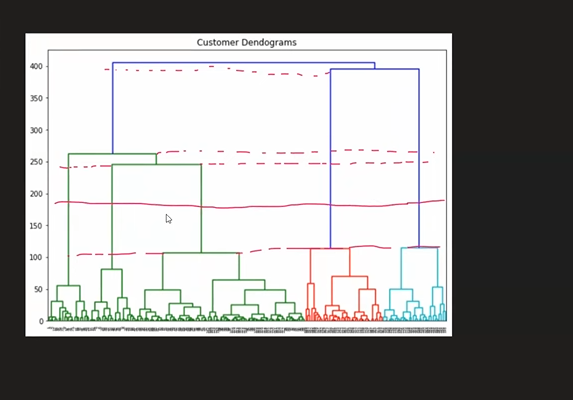


Find the vertical line which is not cut by horizontal line with the max length

### 🧠 How to Find the Ideal Number of Clusters Using a Dendrogram (in Agglomerative Hierarchical Clustering)

A **dendrogram** is a tree-like diagram that shows how clusters are merged step by step in hierarchical clustering. You can use it to visually decide the **optimal number of clusters**.

---

## 🔹 Step-by-Step Method

### 1. **Plot the Dendrogram**

Use `scipy.cluster.hierarchy.dendrogram()` to generate it:

```python
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')  # linkage matrix
dendrogram(Z)
plt.show()
```

### 2. **Look for the Longest Vertical Distance (Biggest Jump) Without Crossing a Horizontal Line**

In the dendrogram:

* **Each horizontal line** represents a merge
* The **height** of the line indicates the **distance** between the clusters being merged

👉 To find the optimal number of clusters:

* Draw a **horizontal line** that cuts the **largest vertical gap** without crossing any horizontal lines
* The **number of vertical lines** this horizontal line intersects = **number of clusters**

---

## 🔸 Visual Intuition

```
            |               ← cut here
            |
            |       ________
            |      |        |            ← big vertical gap = optimal cut
            |      |        |
            |   ___|___  ___|___
            |  |       ||       |
           ------------------------→ samples
```

✂️ The horizontal cut intersects **3 vertical lines** → ideal number of clusters = **3**

---

## 🔹 Tips

* This method is subjective and best when the dendrogram shows clear "jumps"
* Works well with **Ward linkage**, which tends to produce clear cluster boundaries
* For large datasets, dendrograms can become hard to interpret — use **Elbow method** on the linkage distances or **inconsistency metrics** instead

---

## 🧠 Pro Tip (Programmatically)

You can automate cluster cutoff:

```python
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at a fixed height `t`
labels = fcluster(Z, t=20, criterion='distance')  # or 'maxclust' for exact cluster count
```

---


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = customer_data.iloc[:, 3:5].values

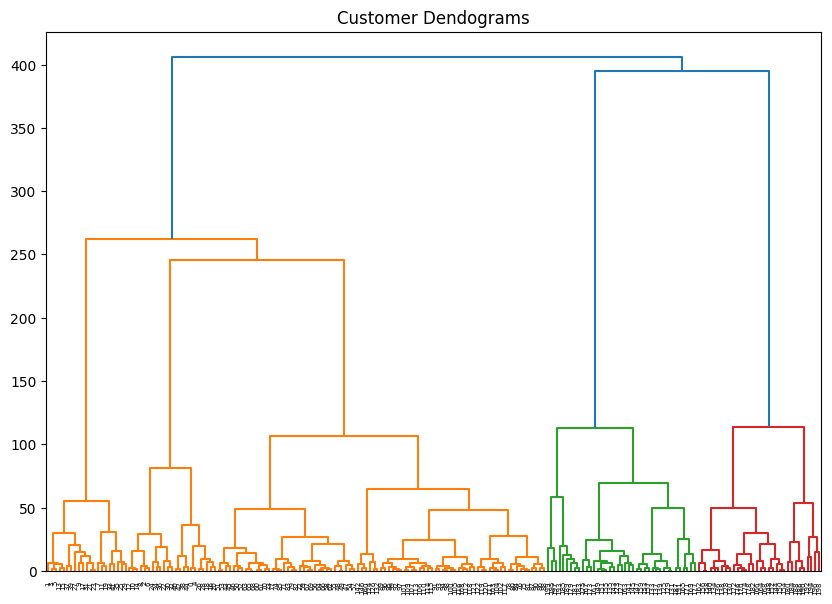

In [5]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_=cluster.fit_predict(data)

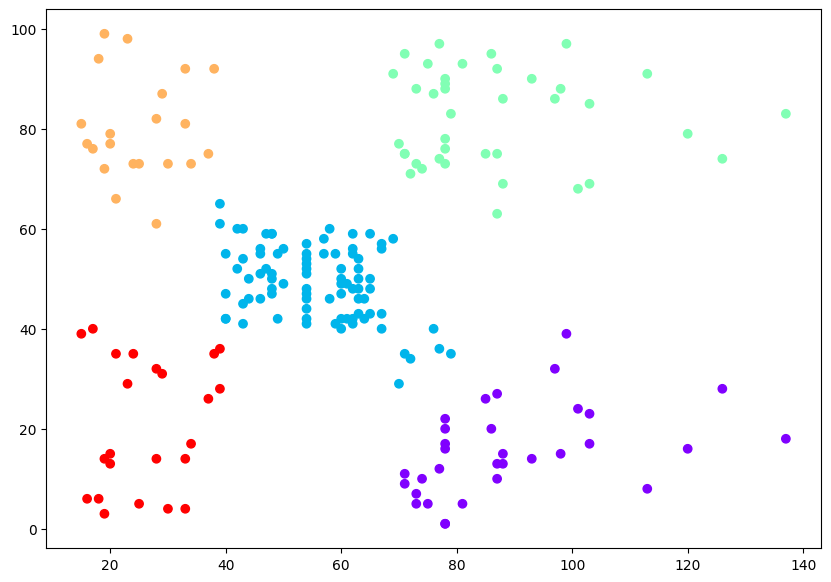

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

### Benefits

1) Widely applicable
2) Dendogram gives clear hierarchy

## Limitation - Can't be used for huge datasets due to the computational cost